# 1. Import and Data Loading

In [2]:
import pandas as pd

# Load the TSV file into a DataFrame
df = pd.read_csv('estat_hlth_silc_30.tsv', delimiter='\t')

# Function to print unique string types or number ranges in each column
def analyze_column(column):
    if df[column].dtype == 'object':  # Check if the column contains string data
        print(f"{column}: {df[column].unique()}")
    else:  # Column contains numeric data
        min_val = df[column].min()
        max_val = df[column].max()
        avg_val = df[column].mean()
        print(f"{column} - Min: {min_val}, Avg: {avg_val:.2f}, Max: {max_val}")

# Iterate through each column and analyze
for col in df.columns:
    analyze_column(col)

freq,sex,age,citizen,reason,unit,geo\TIME_PERIOD: ['A,F,Y16-24,EU27_2007_FOR,FEAR,PC,AT'
 'A,F,Y16-24,EU27_2007_FOR,FEAR,PC,BE'
 'A,F,Y16-24,EU27_2007_FOR,FEAR,PC,BG' ...
 'A,T,Y_GE85,NEU28_FOR,WAITING,PC,UK' 'A,T,Y_GE85,NEU28_FOR,WAITING,PC,XK'
 'A,T,Y_GE85,NEU28_FOR,WAITING,PC_POP,RS']
2008 : ['0.0 ' ': u' '0.2 ' ... '30.6 ' '5.3 e' '35.7 ']
2009 : [': ' '0.0 ' ': u' ... '25.0 ' '26.7 ' '31.4 ']
2010 : [': ' '0.0 ' ': u' ... '29.7 ' '42.6 ' '31.6 ']
2011 : [': ' '0.4 ' '0.0 ' ... '70.7 ' '36.6 ' '23.5 ']
2012 : [': ' '0.2 ' '0.0 ' ... '38.0 ' '34.2 ' '43.1 ']
2013 : [': ' '0.0 ' '0.1 ' ... '64.3 ' '38.4 ' '35.7 ']
2014 : [': ' '0.0 ' ': u' ... '32.2 ' '41.2 ' '40.2 ']
2015 : [': ' '0.0 ' ': u' ... '58.5 ' '38.7 ' '41.5 ']
2016 : [': ' '0.0 ' '0.1 ' ... '38.5 ' '75.6 ' '24.4 ']
2017 : [': ' ': z' '0.0 ' ... '42.8 ' '24.8 u' '75.2 u']
2018 : [': ' ': u' '0.0 ' ... '34.3 ' '66.4 u' '33.6 u']
2019 : [': ' ': u' '0.0 ' ... '46.6 u' '53.4 u' '52.0 u']
2020 : [': ' ': u' '0.0 ' ... '90.4 e'

## 1.1 Investigating the different parameters

In [4]:
# Split the combined column into separate columns
split_columns = df['freq,sex,age,citizen,reason,unit,geo\\TIME_PERIOD'].str.split(',', expand=True)
split_columns.columns = ['freq', 'sex', 'age', 'citizen', 'reason', 'unit', 'geo']

# Show the unique types for each of these new columns
for col in split_columns.columns:
    print(f"{col}: {split_columns[col].unique()}")

freq: ['A']
sex: ['F' 'M' 'T']
age: ['Y16-24' 'Y16-29' 'Y16-44' 'Y16-64' 'Y20-64' 'Y25-29' 'Y25-34' 'Y25-54'
 'Y35-44' 'Y45-49' 'Y45-54' 'Y45-64' 'Y55-64' 'Y65-74' 'Y75-84' 'Y_GE16'
 'Y_GE65' 'Y_GE75' 'Y_GE85']
citizen: ['EU27_2007_FOR' 'EU27_2020_FOR' 'EU28_FOR' 'FOR' 'NAT' 'NEU27_2007_FOR'
 'NEU27_2020_FOR' 'NEU28_FOR']
reason: ['FEAR' 'HOPING' 'NOKNOW' 'NOTIME' 'NO_UNMET' 'OTH' 'TOOEFW' 'TOOEXP'
 'TOOFAR' 'TOTAL' 'WAITING']
unit: ['PC' 'PC_POP']
geo: ['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EA' 'EA18' 'EA19' 'EE' 'EL' 'ES'
 'EU' 'EU27_2007' 'FI' 'FR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'MT' 'NL'
 'NO' 'PL' 'PT' 'RO' 'SE' 'SI' 'SK' 'TR' 'UK' 'AL' 'EA20' 'EU27_2020'
 'EU28' 'HR' 'ME' 'MK' 'RS' 'XK']


## Processing the year columns

In [6]:
import numpy as np

def process_year_columns(df, year):
    #print(list(df.columns))
    #print('\n before: \n', df.head(6))
    
    df[year] = df[year].astype(str)
    #print(list(df.columns))
    #print('\n after1: \n', df.head(6))
    
    # Directly use the year column name from the DataFrame
    # Split the column into two parts: one for the value and one for the symbol
    df[[f'{year.strip()}_value', f'{year.strip()}_flag']] = df[year].str.extract(r'(\d*\.?\d+)?\s*([a-z]*)')
    #print(list(df.columns))
    #print('\n after2: \n', df.head(6))

    # Replace ':' with NaN for the values and handle empty strings if needed
    df[f'{year.strip()}_value'].replace({':': np.nan, '': np.nan}, inplace=True)

    # Convert the numeric values to floats
    df[f'{year.strip()}_value'] = df[f'{year.strip()}_value'].astype(float)

    # Map special symbols to their meanings
    flags_map = {
        '': np.nan,  # Empty string means no flag
        'z': 'not applicable',
        'b': 'break in time series',
        'n': 'not significant',
        'p': 'provisional',
        'u': 'low reliability',
        'e': 'estimated',
        'bu': 'break in time series, low reliability'
    }
    df[f'{year.strip()}_flag'].replace(flags_map, inplace=True)

    return df

# Use the exact column names including spaces
year_columns = [col for col in df.columns if '20' in col]  # This ensures we're capturing the years accurately
#print('beginning \n', year_columns, '\n end')

# Process each year column using the exact names
for year in year_columns:
    df = process_year_columns(df, year)

print('columns processed successfully.')

columns processed successfully.


In [7]:
# optional, for understanding the data better
print(df.columns)

Index(['freq,sex,age,citizen,reason,unit,geo\TIME_PERIOD', '2008 ', '2009 ',
       '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ',
       '2018 ', '2019 ', '2020 ', '2021 ', '2022 ', '2023 ', '2008_value',
       '2008_flag', '2009_value', '2009_flag', '2010_value', '2010_flag',
       '2011_value', '2011_flag', '2012_value', '2012_flag', '2013_value',
       '2013_flag', '2014_value', '2014_flag', '2015_value', '2015_flag',
       '2016_value', '2016_flag', '2017_value', '2017_flag', '2018_value',
       '2018_flag', '2019_value', '2019_flag', '2020_value', '2020_flag',
       '2021_value', '2021_flag', '2022_value', '2022_flag', '2023_value',
       '2023_flag'],
      dtype='object')


In [8]:
# optional, for understanding the data better
for col in df.columns:
    analyze_column(col)

freq,sex,age,citizen,reason,unit,geo\TIME_PERIOD: ['A,F,Y16-24,EU27_2007_FOR,FEAR,PC,AT'
 'A,F,Y16-24,EU27_2007_FOR,FEAR,PC,BE'
 'A,F,Y16-24,EU27_2007_FOR,FEAR,PC,BG' ...
 'A,T,Y_GE85,NEU28_FOR,WAITING,PC,UK' 'A,T,Y_GE85,NEU28_FOR,WAITING,PC,XK'
 'A,T,Y_GE85,NEU28_FOR,WAITING,PC_POP,RS']
2008 : ['0.0 ' ': u' '0.2 ' ... '30.6 ' '5.3 e' '35.7 ']
2009 : [': ' '0.0 ' ': u' ... '25.0 ' '26.7 ' '31.4 ']
2010 : [': ' '0.0 ' ': u' ... '29.7 ' '42.6 ' '31.6 ']
2011 : [': ' '0.4 ' '0.0 ' ... '70.7 ' '36.6 ' '23.5 ']
2012 : [': ' '0.2 ' '0.0 ' ... '38.0 ' '34.2 ' '43.1 ']
2013 : [': ' '0.0 ' '0.1 ' ... '64.3 ' '38.4 ' '35.7 ']
2014 : [': ' '0.0 ' ': u' ... '32.2 ' '41.2 ' '40.2 ']
2015 : [': ' '0.0 ' ': u' ... '58.5 ' '38.7 ' '41.5 ']
2016 : [': ' '0.0 ' '0.1 ' ... '38.5 ' '75.6 ' '24.4 ']
2017 : [': ' ': z' '0.0 ' ... '42.8 ' '24.8 u' '75.2 u']
2018 : [': ' ': u' '0.0 ' ... '34.3 ' '66.4 u' '33.6 u']
2019 : [': ' ': u' '0.0 ' ... '46.6 u' '53.4 u' '52.0 u']
2020 : [': ' ': u' '0.0 ' ... '90.4 e'

<Figure size 1500x800 with 0 Axes>

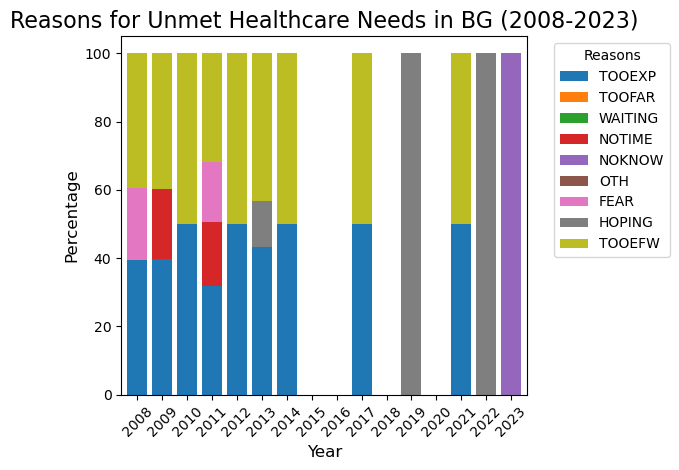

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_stacked_reasons(df, country_code='BG'):
    # List of reasons (excluding 'TOTAL' and 'NO_UNMET')
    reasons = ['TOOEXP', 'TOOFAR', 'WAITING', 'NOTIME', 'NOKNOW', 'OTH', 'FEAR', 'HOPING', 'TOOEFW']
    
    # Prepare data
    data = []
    year_columns = [str(year) for year in range(2008, 2024)]
    
    for reason in reasons:
        filter_string = f'A,T,Y16-24,FOR,{reason},PC,{country_code}'
        row = df[df['freq,sex,age,citizen,reason,unit,geo\\TIME_PERIOD'] == filter_string]
        
        if not row.empty:
            values = [row[f'{year}_value'].values[0] if f'{year}_value' in row.columns else np.nan for year in year_columns]
            data.append(values)
    
    # Create DataFrame
    df_plot = pd.DataFrame(data, index=reasons, columns=year_columns).T
    
    # Normalize to 100%
    df_plot = df_plot.div(df_plot.sum(axis=1), axis=0) * 100
    
    # Plot
    plt.figure(figsize=(15, 8))
    ax = df_plot.plot(kind='bar', stacked=True, width=0.8)
    
    plt.title(f'Reasons for Unmet Healthcare Needs in {country_code} (2008-2023)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend(title='Reasons', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(f'stacked_reasons_{country_code}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
plot_stacked_reasons(df, country_code='BG')

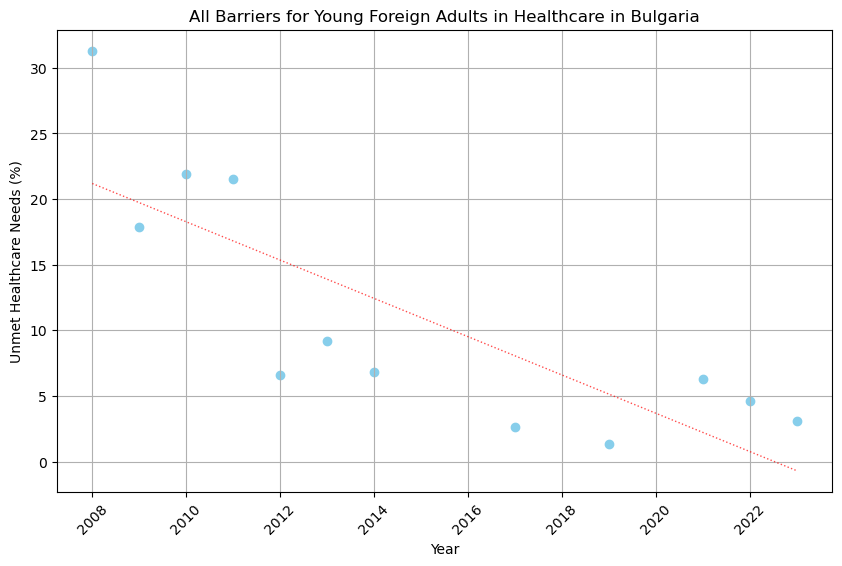

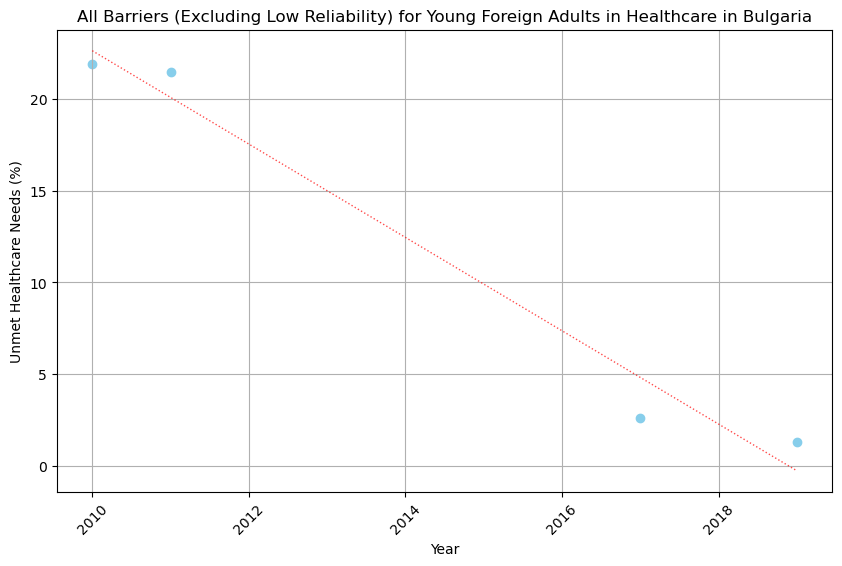

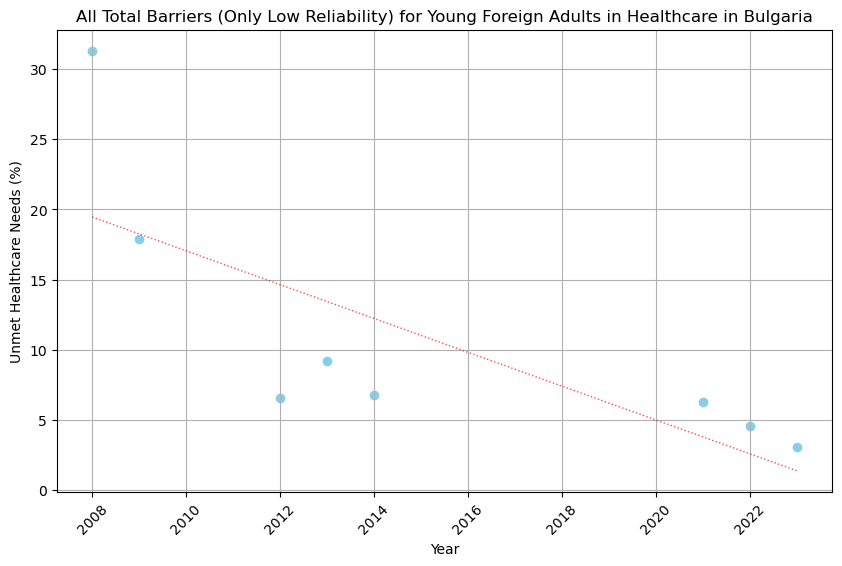

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def lin_func(x, a, b):
    return a * x + b

def plot_data_with_flag_filtering(df, filter_string, title, exclude_flags=None, include_flags=None, filename=None):
    if exclude_flags is None:
        exclude_flags = {}
    if include_flags is None:
        include_flags = {}
    # Filter the DataFrame based on the specific condition
    filtered_data = df[df['freq,sex,age,citizen,reason,unit,geo\\TIME_PERIOD'] == filter_string]
    # Prepare data for plotting
    year_columns = [str(year) for year in range(2008, 2024)]
    values = []
    years = []
    # Exclude or include specific flags if specified
    for year in year_columns:
        year_value_col = f'{year}_value'
        year_flag_col = f'{year}_flag'
        
        # Apply flag filters
        if year_flag_col in df.columns:
            year_data = filtered_data[[year_value_col, year_flag_col]].dropna(subset=[year_value_col])
            if exclude_flags:
                for flag, exclude in exclude_flags.items():
                    if exclude:
                        year_data = year_data[year_data[year_flag_col] != flag]
            if include_flags:
                for flag, include in include_flags.items():
                    if include:
                        year_data = year_data[year_data[year_flag_col] == flag]
        else:
            year_data = filtered_data[[year_value_col]].dropna()
        # Append data to lists for plotting
        if not year_data.empty and year_data[year_value_col].values[0] != 0:
            values.append(year_data[year_value_col].values[0])
            years.append(int(year))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(years, values, marker='o', color='skyblue')
    
    # Linear fit
    if len(years) > 1:
        popt, _ = curve_fit(lin_func, years, values, maxfev=1000)
        x_fit = np.linspace(min(years), max(years), 100)
        y_fit = lin_func(x_fit, *popt)
        plt.plot(x_fit, y_fit, color='red', linestyle=':', alpha=0.7, linewidth=1)
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Unmet Healthcare Needs (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Example usage of the function

plot_data_with_flag_filtering(df, 'A,T,Y16-24,FOR,TOTAL,PC,BG', 'All Barriers for Young Foreign Adults in Healthcare in Bulgaria', exclude_flags={'estimated': False, 'low reliability': False}, filename='total_barriers_young_foreign_adults_bg.png')

plot_data_with_flag_filtering(df, 'A,T,Y16-24,FOR,TOTAL,PC,BG', 'All Barriers (Excluding Low Reliability) for Young Foreign Adults in Healthcare in Bulgaria', exclude_flags={'estimated': False, 'low reliability': True}, filename='total_barriers_excluding_lr_young_foreign_adults_bg.png')

plot_data_with_flag_filtering(df, 'A,T,Y16-24,FOR,TOTAL,PC,BG', 'All Total Barriers (Only Low Reliability) for Young Foreign Adults in Healthcare in Bulgaria', include_flags={'low reliability': True}, filename='total_barriers_only_lr_young_foreign_adults_bg.png')


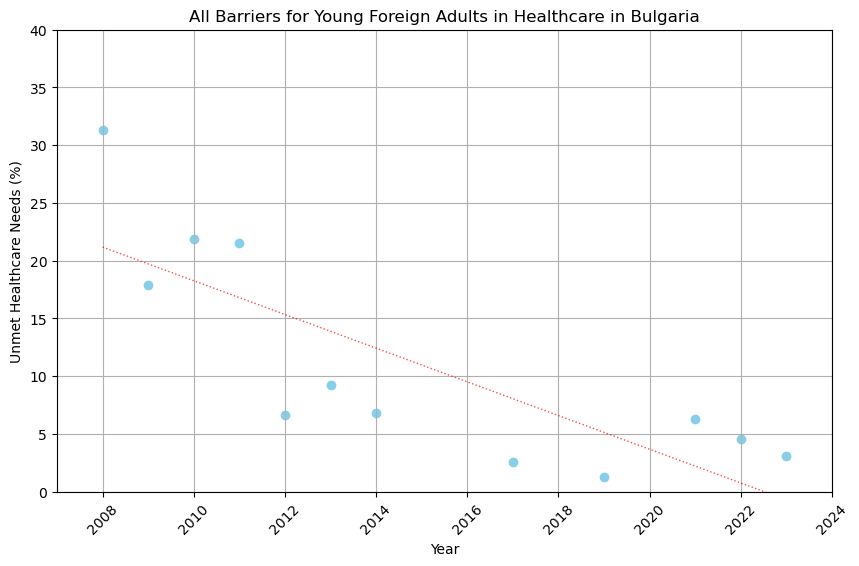

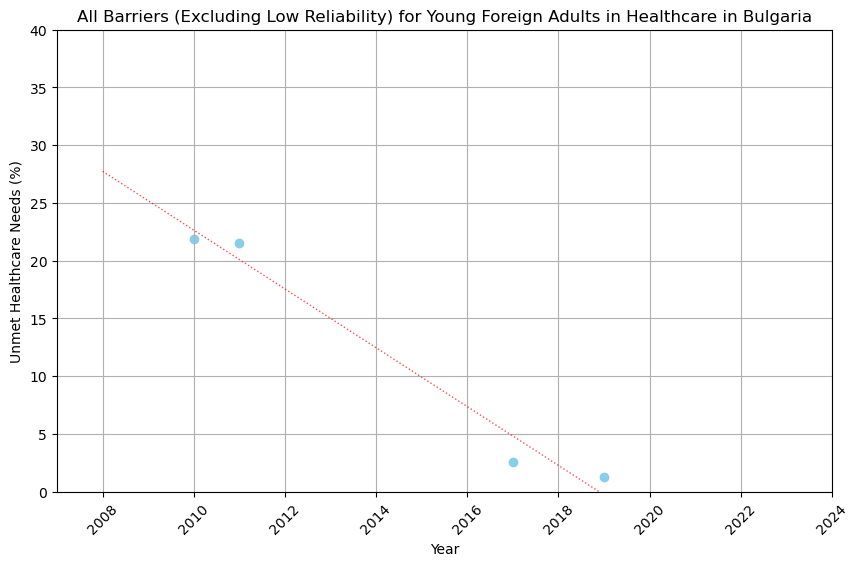

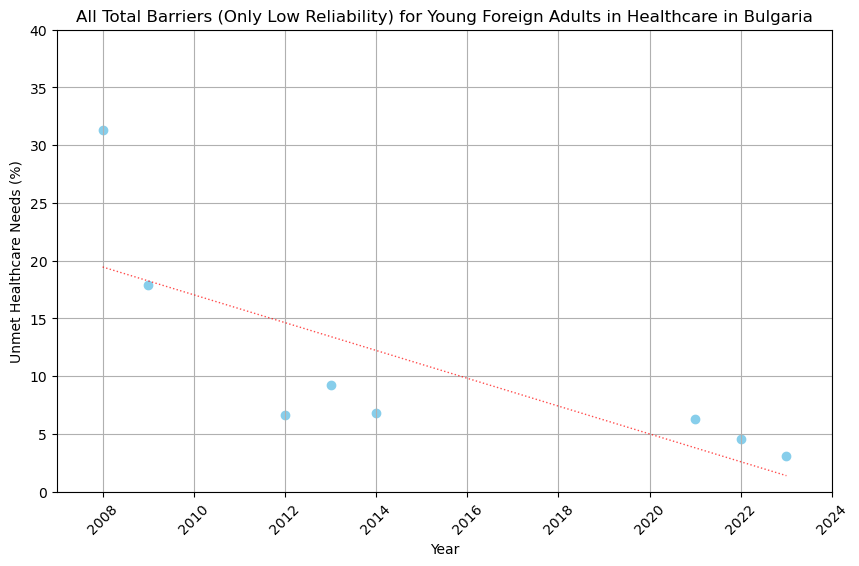

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def log_func(x, a, b):
    return a * x + b

def plot_data_with_flag_filtering(df, filter_string, title, exclude_flags=None, include_flags=None, filename=None):
    if exclude_flags is None:
        exclude_flags = {}
    if include_flags is None:
        include_flags = {}
    # Filter the DataFrame based on the specific condition
    filtered_data = df[df['freq,sex,age,citizen,reason,unit,geo\\TIME_PERIOD'] == filter_string]
    # Prepare data for plotting
    year_columns = [str(year) for year in range(2008, 2024)]
    values = []
    years = []
    # Exclude or include specific flags if specified
    for year in year_columns:
        year_value_col = f'{year}_value'
        year_flag_col = f'{year}_flag'
        
        # Apply flag filters
        if year_flag_col in df.columns:
            year_data = filtered_data[[year_value_col, year_flag_col]].dropna(subset=[year_value_col])
            if exclude_flags:
                for flag, exclude in exclude_flags.items():
                    if exclude:
                        year_data = year_data[year_data[year_flag_col] != flag]
            if include_flags:
                for flag, include in include_flags.items():
                    if include:
                        year_data = year_data[year_data[year_flag_col] == flag]
        else:
            year_data = filtered_data[[year_value_col]].dropna()
        # Append data to lists for plotting
        if not year_data.empty and year_data[year_value_col].values[0] != 0:
            values.append(year_data[year_value_col].values[0])
            years.append(int(year))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(years, values, marker='o', color='skyblue')
    
    # Logarithmic fit
    if len(years) > 1:
        popt, _ = curve_fit(log_func, years, values, maxfev=1000)
        x_fit = np.linspace(2008, 2023, 100)  # Ensure x_fit spans the full range
        y_fit = log_func(x_fit, *popt)
        plt.plot(x_fit, y_fit, color='red', linestyle=':', alpha=0.7, linewidth=1)
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Unmet Healthcare Needs (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Set the x and y axis limits
    plt.xlim(2007, 2024)
    plt.ylim(0, 40)
    
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Example usage of the function

plot_data_with_flag_filtering(df, 'A,T,Y16-24,FOR,TOTAL,PC,BG', 'All Barriers for Young Foreign Adults in Healthcare in Bulgaria', exclude_flags={'estimated': False, 'low reliability': False}, filename='total_barriers_young_foreign_adults_bg.png')

plot_data_with_flag_filtering(df, 'A,T,Y16-24,FOR,TOTAL,PC,BG', 'All Barriers (Excluding Low Reliability) for Young Foreign Adults in Healthcare in Bulgaria', exclude_flags={'estimated': False, 'low reliability': True}, filename='total_barriers_excluding_lr_young_foreign_adults_bg.png')

plot_data_with_flag_filtering(df, 'A,T,Y16-24,FOR,TOTAL,PC,BG', 'All Total Barriers (Only Low Reliability) for Young Foreign Adults in Healthcare in Bulgaria', include_flags={'low reliability': True}, filename='total_barriers_only_lr_young_foreign_adults_bg.png')

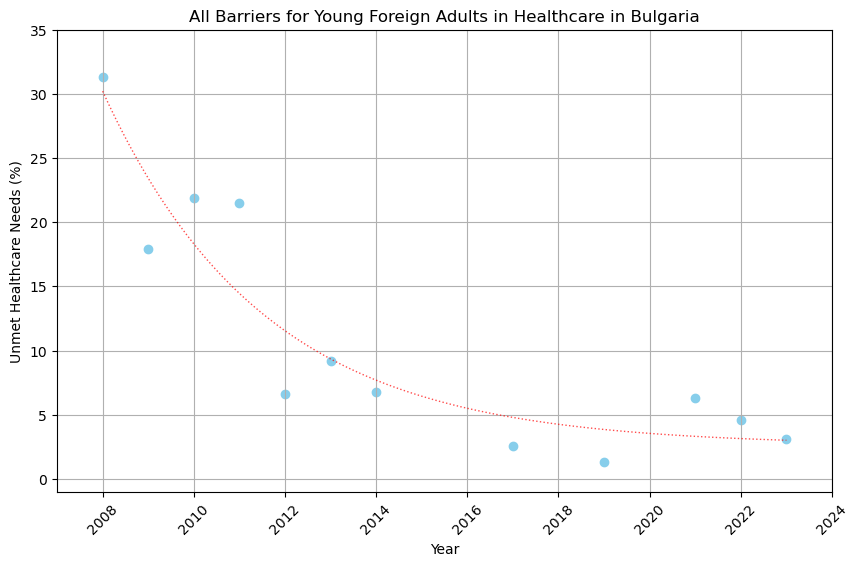

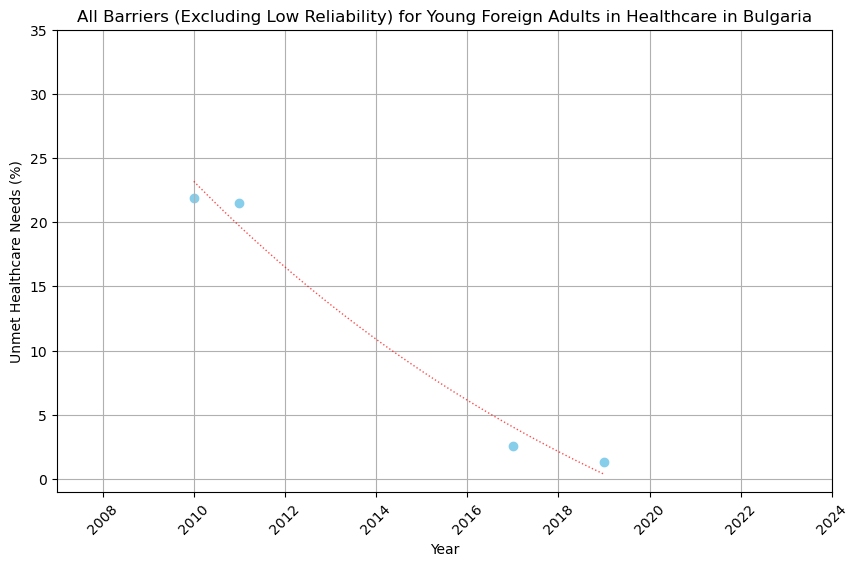

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the exponential decay function
def exp_decay_func(x, a, b, c):
    return a * np.exp(-b * x) + c

def plot_data_with_flag_filtering(df, filter_string, title, exclude_flags=None, include_flags=None, filename=None):
    if exclude_flags is None:
        exclude_flags = {}
    if include_flags is None:
        include_flags = {}
    # Filter the DataFrame based on the specific condition
    filtered_data = df[df['freq,sex,age,citizen,reason,unit,geo\\TIME_PERIOD'] == filter_string]
    # Prepare data for plotting
    year_columns = [str(year) for year in range(2008, 2024)]
    values = []
    years = []
    # Exclude or include specific flags if specified
    for year in year_columns:
        year_value_col = f'{year}_value'
        year_flag_col = f'{year}_flag'
        
        # Apply flag filters
        if year_flag_col in df.columns:
            year_data = filtered_data[[year_value_col, year_flag_col]].dropna(subset=[year_value_col])
            if exclude_flags:
                for flag, exclude in exclude_flags.items():
                    if exclude:
                        year_data = year_data[year_data[year_flag_col] != flag]
            if include_flags:
                for flag, include in include_flags.items():
                    if include:
                        year_data = year_data[year_data[year_flag_col] == flag]
        else:
            year_data = filtered_data[[year_value_col]].dropna()
        # Append data to lists for plotting
        if not year_data.empty and year_data[year_value_col].values[0] != 0:
            values.append(year_data[year_value_col].values[0])
            years.append(int(year))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(years, values, marker='o', color='skyblue')
    
    # Exponential decay fit
    if len(years) > 1:
        # Normalize years to start from 0 for better fitting
        normalized_years = np.array(years) - min(years)
        popt, _ = curve_fit(exp_decay_func, normalized_years, values, maxfev=1000)
        x_fit = np.linspace(0, max(normalized_years), 100)  # Ensure x_fit spans the full range
        y_fit = exp_decay_func(x_fit, *popt)
        plt.plot(x_fit + min(years), y_fit, color='red', linestyle=':', alpha=0.7, linewidth=1)
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Unmet Healthcare Needs (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Set the x and y axis limits
    plt.xlim(2007, 2024)
    plt.ylim(-1, 35)
    
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Example usage of the function

plot_data_with_flag_filtering(df, 'A,T,Y16-24,FOR,TOTAL,PC,BG', 'All Barriers for Young Foreign Adults in Healthcare in Bulgaria', exclude_flags={'estimated': False, 'low reliability': False}, filename='total_barriers_young_foreign_adults_bg.png')

plot_data_with_flag_filtering(df, 'A,T,Y16-24,FOR,TOTAL,PC,BG', 'All Barriers (Excluding Low Reliability) for Young Foreign Adults in Healthcare in Bulgaria', exclude_flags={'estimated': False, 'low reliability': True}, filename='total_barriers_excluding_lr_young_foreign_adults_bg.png')

#plot_data_with_flag_filtering(df, 'A,T,Y16-24,FOR,TOTAL,PC,BG', 'All Total Barriers (Only Low Reliability) for Young Foreign Adults in Healthcare in Bulgaria', include_flags={'low reliability': True}, filename='total_barriers_only_lr_young_foreign_adults_bg.png')